[107, 548, 178, 1574, 834, 545, 220, 1717, 1845, 1791, 78, 776, 1098, 1151, 680, 697, 1745, 106, 326, 276, 690, 1148, 683, 1437, 502, 335, 3, 1855, 893, 1584, 179, 1799, 1223, 773, 143, 13, 646, 1499, 918, 208, 1854, 89, 189, 1366, 291, 258, 1618, 1856, 43, 597, 1866, 881, 1174, 976, 543, 961, 1715, 75, 624, 703, 1068, 1641, 989, 423, 1681, 1247, 1308, 1079, 1156, 1657, 1967, 645, 25, 815, 1828, 1575, 1323, 1050, 889, 1402, 1102, 1307, 1631, 1365, 1221, 1822, 1707, 995, 1066, 1369, 859, 767, 1044, 65, 1735, 1544, 1321, 371, 1486, 1679, 169, 1871, 997, 1347, 536, 348, 685, 1135, 801, 1810, 150, 1480, 935, 793, 1173, 1594, 688, 33, 387, 1200, 180, 1703, 1286, 744, 26, 1835, 720, 469, 830, 1089, 1026, 1482, 1687, 1861, 122, 589, 1013, 1974, 1565, 1290, 1475, 477, 1114, 990, 363, 314, 910, 775, 1539, 944, 90, 20, 275, 934, 395, 525, 1636, 556, 1955, 1298, 860, 0, 222, 1264, 128, 1045, 727, 1448, 181, 887, 1838, 17, 1629, 1097, 1119, 1421, 1300, 827, 59, 660, 537, 1957, 967, 67, 1537, 1150,

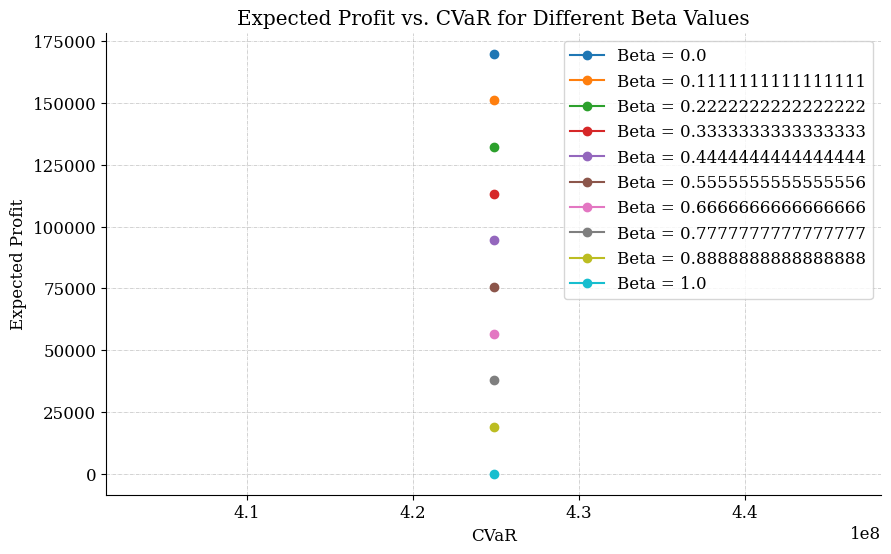

Solving for beta = 0.0...
-----------------------------------------------
Objective value (expected profit + 0.0 * CVaR): 3825505571.80 EUR
-----------------------------------------------
Day-ahead bids:
Hour 0 | Bid: 0.00 MW | Average Profit: 5411.43 EUR
Hour 1 | Bid: 0.00 MW | Average Profit: 5316.92 EUR
Hour 2 | Bid: 0.00 MW | Average Profit: 5008.75 EUR
Hour 3 | Bid: 0.00 MW | Average Profit: 4746.01 EUR
Hour 4 | Bid: 0.00 MW | Average Profit: 4553.44 EUR
Hour 5 | Bid: 0.00 MW | Average Profit: 4872.71 EUR
Hour 6 | Bid: 0.00 MW | Average Profit: 5363.76 EUR
Hour 7 | Bid: 0.00 MW | Average Profit: 6245.81 EUR
Hour 8 | Bid: 0.00 MW | Average Profit: 6882.94 EUR
Hour 9 | Bid: 0.00 MW | Average Profit: 6747.87 EUR
Hour 10 | Bid: 0.00 MW | Average Profit: 6999.94 EUR
Hour 11 | Bid: 0.00 MW | Average Profit: 6840.13 EUR
Hour 12 | Bid: 0.00 MW | Average Profit: 6732.63 EUR
Hour 13 | Bid: 0.00 MW | Average Profit: 6894.85 EUR
Hour 14 | Bid: 0.00 MW | Average Profit: 6493.41 EUR
Hour 15 | B

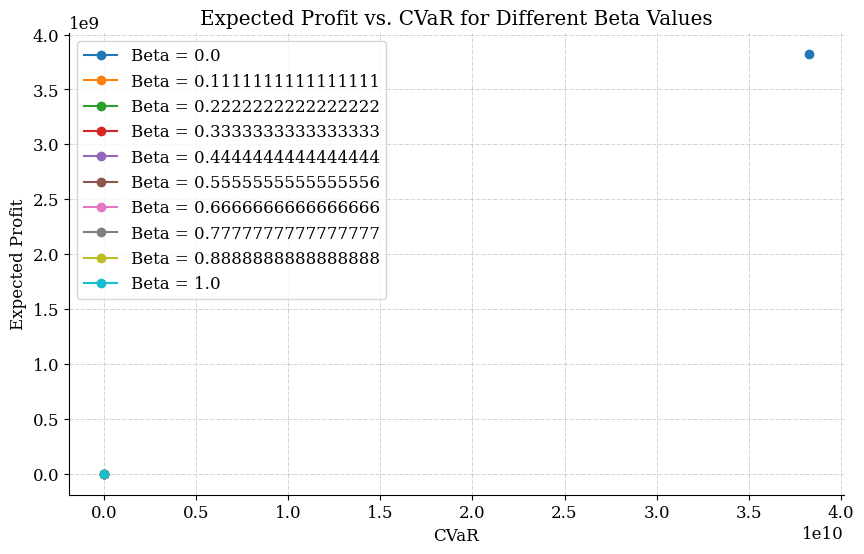

In [17]:
import gurobipy as gb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import random

#from task_1c import cvr_op_scheme
_ = %run -i task_1c.ipynb

plt.rcParams['font.size']=12
plt.rcParams['font.family']='serif'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False  
plt.rcParams['axes.spines.bottom'] = True     
plt.rcParams["axes.grid"] = True
plt.rcParams['grid.linestyle'] = '-.' 
plt.rcParams['grid.linewidth'] = 0.4


In [18]:
with open('Data/ALL_scenarios.json') as f:
    all_scenarios = json.load(f)

all_scenarios.keys()
OMEGA = 250 # number of scenarios to sample
PI = 1 / OMEGA # probability of each sampled scenario - assumed to be equal

S = len(all_scenarios.keys()) - 1 # number of total scenarios
T = 24 # number of hours

WIND_CAPACITY = 200 #MWh

random.seed(123)

# Sample scenarios without replacement
in_sample_scenarios = random.sample(range(S), 250)

scenarios = {}

# Extract sampled scenarios from dictionary containing all scenarios
for i in range(len(in_sample_scenarios)):
    scenarios[str(i)] = all_scenarios[str(in_sample_scenarios[i])]
    scenarios[str(i)]['Original Index'] = in_sample_scenarios[i]
    

# Indices of all scenarios
all_indices = list(range(S))

# Indices of out-of-sample scenarios
out_of_sample_indices = list(set(all_indices) - set(in_sample_scenarios))

# Sample 950 out-of-sample scenarios without replacement
out_sample_indices = random.sample(out_of_sample_indices, 950)
print(out_sample_indices)

# Extract out-of-sample scenarios from the dictionary containing all scenarios
out_sample_scenarios = {}
for i, idx in enumerate(out_sample_indices):
    out_sample_scenarios[str(i)] = all_scenarios[str(idx)]
    out_sample_scenarios[str(i)]['Original Index'] = idx

# Print information
print('Number of out-of-sample scenarios:', len(out_sample_scenarios))


[378, 1226, 756, 1214, 1210, 1306, 330, 803, 1178, 253, 1277, 1706, 863, 521, 1338, 794, 228, 630, 1190, 566, 474, 749, 612, 936, 109, 1179, 199, 460, 1188, 465, 1777, 45, 454, 620, 1327, 534, 210, 1408, 738, 206, 796, 1301, 1260, 321, 1899, 1253, 325, 1844, 1139, 1160, 1719, 1973, 1823, 72, 595, 1675, 1356, 1143, 795, 928, 520, 1180, 305, 1428, 1489, 15, 1865, 1857, 1410, 1427, 1164, 1991, 1634, 1374, 296, 1623, 133, 842, 1082, 845, 1569, 986, 735, 838, 504, 1807, 1053, 802, 1904, 1768, 451, 427, 897, 1893, 155, 973, 876, 1990, 614, 414, 1313, 879, 862, 171, 686, 1918, 1894, 1183, 1418, 1976, 138, 892, 130, 1377, 909, 694, 261, 1093, 1346, 1795, 1660, 755, 564, 1516, 1043, 615, 1030, 1322, 1341, 804, 576, 1622, 1070, 1931, 1350, 637, 786, 121, 430, 298, 51, 1005, 1549, 1168, 1725, 318, 1124, 1254, 108, 1108, 1269, 339, 758, 865, 513, 1403, 82, 1088, 1186, 1924, 1816, 668, 1659, 1361, 36, 746, 1716, 905, 528, 1615, 156, 586, 659, 400, 977, 836, 999, 1971, 1423, 34, 1169, 1580, 392, 462

In [ ]:
beta_values = np.linspace(0, 1, 10) 
alpha = 0.9
results_per_beta, p_DA_values_op = cvr_op_scheme(scenarios, WIND_CAPACITY, T, OMEGA, alpha, beta_values)
results_per_beta, p_DA_values_tp = cvr_tp_scheme(scenarios, WIND_CAPACITY, T, OMEGA, alpha, beta_values)

In [28]:

desired_beta = 0.5555555555555556

p_DA_star_op= p_DA_values_op[desired_beta]
print(f"p_DA values for beta={desired_beta}:")
for hour, value in enumerate(p_DA_star_op):
    print(f"Hour {hour}: {value}")

p_DA_star_tp = p_DA_values_tp[desired_beta]
print(f"p_DA values for beta={desired_beta}:")
for hour, value in enumerate(p_DA_star_tp):
    print(f"Hour {hour}: {value}")


p_DA values for beta=0.5555555555555556:
Hour 0: 0.0
Hour 1: 0.0
Hour 2: 0.0
Hour 3: 0.0
Hour 4: 0.0
Hour 5: 0.0
Hour 6: 200.0
Hour 7: 0.0
Hour 8: 200.0
Hour 9: 200.0
Hour 10: 0.0
Hour 11: 0.0
Hour 12: 0.0
Hour 13: 0.0
Hour 14: 200.0
Hour 15: 0.0
Hour 16: 200.0
Hour 17: 0.0
Hour 18: 0.0
Hour 19: 0.0
Hour 20: 0.0
Hour 21: 0.0
Hour 22: 200.0
Hour 23: 0.0
p_DA values for beta=0.5555555555555556:
Hour 0: 0.0
Hour 1: 0.0
Hour 2: 0.0
Hour 3: 5.915268275202834e-12
Hour 4: 0.0
Hour 5: 6.611600156247732e-12
Hour 6: 0.0
Hour 7: 0.0
Hour 8: 0.0
Hour 9: 0.0
Hour 10: 0.0
Hour 11: 0.0
Hour 12: 0.0
Hour 13: 0.0
Hour 14: 0.0
Hour 15: 0.0
Hour 16: 0.0
Hour 17: 0.0
Hour 18: 0.0
Hour 19: 0.0
Hour 20: 0.0
Hour 21: 0.0
Hour 22: 0.0
Hour 23: 0.0


In [32]:
# Calculate profit or payment for each out-of-sample scenario
total_profit = 0
for i in range(len(out_sample_scenarios)):
    scenario = out_sample_scenarios[str(i)]
    profit = 0
    for hour in range(T):
        # Retrieve optimal hourly quantity offer from day-ahead stage
        p_DA_star_t = p_DA_star_op[hour]  # Assuming p_DA_star_op is defined

        # Realized quantity from the scenario
        realized_quantity = scenario['Wind'][hour]

        # Calculate payment or profit for the hour
        payment_or_profit = realized_quantity * p_DA_star_t

        profit += payment_or_profit

    # Calculate the total profit across all scenarios
    total_profit += profit

    # Print payment or profit for the scenario
    print(f"Profit for scenario {i + 1}: {profit}")

# # Calculate average out-of-sample profit
# average_profit = total_profit / len(out_sample_scenarios)
# print(f"Average out-of-sample profit: {average_profit}")
# Define your function to calculate profit/payment for each scenario
# def calculate_profit(scenario, p_DA_star):
#     realized_generation = scenario['Wind Generation']
#     profit = sum(p_DA_star[hour] * realized_generation[hour] for hour in range(T))
#     return profit

# # Initialize lists to store profits/payments for each scenario
# payments = []
# profits = []

# # Calculate payments/profits for each unseen scenario
# for i, scenario in out_sample_scenarios.items():
#     p_DA_star_op = p_DA_values_op[desired_beta]  # Assuming p_DA_values_op is defined elsewhere
#     profit = calculate_profit(scenario, p_DA_star_op)
#     profits.append(profit)
#     payment = profit - scenario['Payment']
#     payments.append(payment)

# # Calculate the average out-of-sample profit
# average_profit = sum(profits) / len(profits)

# print("Average out-of-sample profit:", average_profit)

KeyError: 'Wind'